## ФИО: Нафикова Лиана Ирековна

Вам предоставлен набор данных, который содержит информацию о клиентах банка:

`client_id` - ID клиента (неотрицательное целое число)

`Age` - возраст (вещественный)

`Income` - месячный доход (вещественный)

`BalanceToCreditLimit` - отношение баланса на кредитной карте к лимту по кредиту (вещественный)

`DIR` - Debt-to-income Ratio (вещественный)

`NumLoans` - число заемов и кредитных линий

`NumRealEstateLoans` - число ипотек и заемов, связанных с недвижимостью (натуральное число)

`NumDependents` - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)

`Num30-59Delinquencies` - число просрочек выплат по кредиту от 30 до 59 дней (натуральное число)

`Num60-89Delinquencies` - число просрочек выплат по кредиту от 60 до 89 дней (натуральное число)

`Delinquent90` - Таргет, были ли просрочки выплат по кредиту более 90 дней (бинарный)


### Задание:

1. Анализ и предобработка.

    1.1. Проанализировать данные (EDA).

    1.2. Предобработать данные.

    1.3. Скалировать/нормализовать данные.

    1.4. Подготовить данные для обучения моделей.

2. Дерево решений.

    2.1. Обучить дерево решений, визуализировать решающее дерево

    2.2. Рассмотреть, как изменение глубины дерева влияет на качество модели. Обучите решающее дерево с различной глубиной (от 1 до 11), оцените его точность и определите, когда начинается переобучение и какая глубина дерева является оптимальной.

    2.3. Подберите оптимальные параметры дерева с помощью GridSearhCV.

3. Ансамблевые методы.

    3.1. Выберите любую классическую модель (не ансамблевую) и обучите ансамбль с помощью бэггинга (BaggingClassifier). Подберите оптимальные параметры как  бэггинга так и модели с помощью GridSearhCV.

    3.2. Выберите любые классические модели (не ансамблевые) и обучите ансамбль с помощью стекинга (StackingClassifier). Подберите оптимальные параметры как  стекинга так и модели с помощью GridSearhCV.

    3.3. Обучите cлучайный лес (RandomForestClassifier), настройте гиперпараметры случайного леса с помощью GridSearhCV.

    3.4. Инициализируете параметры и обучите классификатор XGBoost (обратите внимание, что XGBoost работает только с числовыми признаками). Вычислите F score (не F мера!) для оценки важности признаков в XGBoost.

In [262]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [263]:
data = pd.read_csv("../data/data_lab_3.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              75000 non-null  int64  
 1   DIR                    75000 non-null  float64
 2   Age                    75000 non-null  float64
 3   NumLoans               75000 non-null  int64  
 4   NumRealEstateLoans     75000 non-null  int64  
 5   NumDependents          73084 non-null  float64
 6   Num30-59Delinquencies  75000 non-null  int64  
 7   Num60-89Delinquencies  75000 non-null  int64  
 8   Income                 60153 non-null  float64
 9   BalanceToCreditLimit   75000 non-null  float64
 10  Delinquent90           75000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 6.3 MB


### Анализ и предобработка

In [264]:
display(data.describe())

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
count,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,73084.000000,75000.000000,75000.000000,6.015300e+04,75000.000000,75000.000000
mean,37499.500000,353.260293,52.595605,8.44976,1.016693,0.755966,0.428320,0.248000,6.740059e+03,6.276196,0.066840
std,21650.779432,2117.237432,14.869729,5.15644,1.124019,1.108119,4.276439,4.239486,1.422875e+04,267.743321,0.249746
min,0.000000,0.000000,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,18749.750000,0.176022,41.300000,5.00000,0.000000,0.000000,0.000000,0.000000,3.421354e+03,0.029703,0.000000
50%,37499.500000,0.366848,52.200000,8.00000,1.000000,0.000000,0.000000,0.000000,5.424552e+03,0.153720,0.000000
75%,56249.250000,0.862650,63.100000,11.00000,2.000000,1.000000,0.000000,0.000000,8.291518e+03,0.560638,0.000000
max,74999.000000,332600.272820,109.800000,56.00000,32.000000,20.000000,98.000000,98.000000,1.805573e+06,50873.874533,1.000000


In [265]:
def info (df):
    """
        Выводит информацию о столбцах с пропущенными значениями в DataFrame Pandas.
    """
    counter = 0
    for col in df:
        missing_perc = (df[col].isnull().sum() / len(df[col])) * 100
        if df[col].isnull().sum() != 0:
            counter += 1
            print(f'Column "{col}" has {missing_perc:.2f}% missing')
    print(f'"{counter}" columns have missing values')

info(data)

Column "NumDependents" has 2.55% missing
Column "Income" has 19.80% missing
"2" columns have missing values


In [266]:
for col in data.columns:
    print(f"Колонка '{col}': {data[col].nunique()} уникальных значений")

Колонка 'client_id': 75000 уникальных значений
Колонка 'DIR': 70376 уникальных значений
Колонка 'Age': 527 уникальных значений
Колонка 'NumLoans': 55 уникальных значений
Колонка 'NumRealEstateLoans': 24 уникальных значений
Колонка 'NumDependents': 13 уникальных значений
Колонка 'Num30-59Delinquencies': 16 уникальных значений
Колонка 'Num60-89Delinquencies': 11 уникальных значений
Колонка 'Income': 59346 уникальных значений
Колонка 'BalanceToCreditLimit': 63413 уникальных значений
Колонка 'Delinquent90': 2 уникальных значений


In [267]:
num_features = data[['DIR', 'Age', 'Income', 'BalanceToCreditLimit']].columns

In [268]:
num_transformer = Pipeline([
    ('median', SimpleImputer()),
    ('scaler', StandardScaler())
])

In [269]:
cat_features = data[['NumLoans','NumRealEstateLoans','NumDependents', 'Num30-59Delinquencies', 'Num60-89Delinquencies']].columns

In [270]:
cat_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [271]:
for col in cat_features:
    data[col] = data[col].astype('object')

In [272]:
data = data.drop_duplicates(keep=False)

In [273]:
ct = ColumnTransformer(
    transformers=[
        ('num', num_transformer, list(num_features)),
        ('cat', cat_transformer, list(cat_features)),
    ],
)

### Дерево решений

In [88]:
X = data.drop(['Delinquent90', 'client_id'], axis=1)  
y = data['Delinquent90']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42) 

In [89]:
print("Размер тренировочного набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер тренировочного набора: (60000, 9)
Размер тестового набора: (15000, 9)


In [94]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

depths = [i for i in range(1, 20)] 
train_accuracies, test_accuracies = [], []
for i, max_depth in enumerate(depths):
    pipeline = Pipeline([
    ('ct', ct),
    ('model',  DecisionTreeClassifier(max_depth=max_depth)),
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


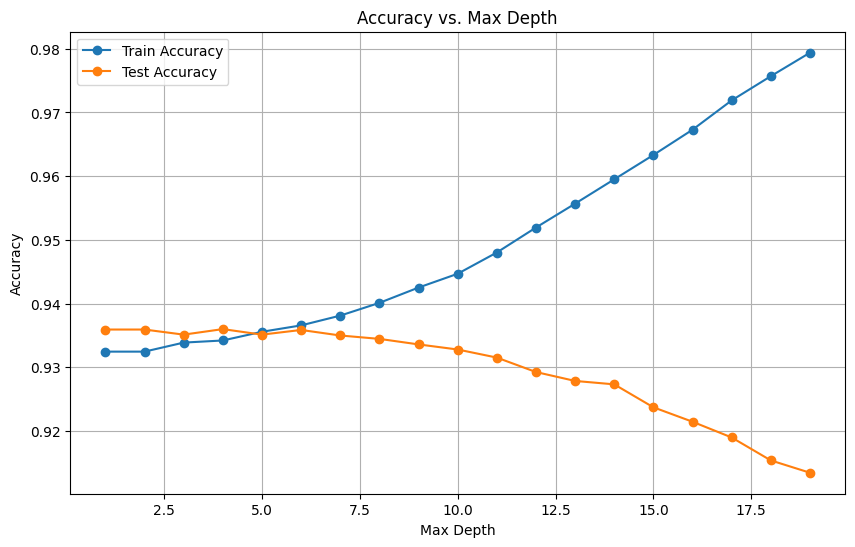

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(depths, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
param_grid = {
    'max_depth': range(1, 12),
    'min_samples_split': range(2, 11), 
    'min_samples_leaf': range(1, 6)
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(ct, 
                    GridSearchCV(DecisionTreeClassifier(),
                                 param_grid=param_grid, cv=5, refit=True, scoring='accuracy', verbose=1, n_jobs=-1))

clf.fit(X_train, y_train)

Fitting 5 folds for each of 495 candidates, totalling 2475 fits


array([1, 0, 0, ..., 0, 0, 0])

In [105]:
y_pred = clf.predict(X_test)

In [106]:
print("Лучшие параметры:", clf.named_steps['gridsearchcv'].best_params_) 
print("Лучшая оценка (точность):", clf.named_steps['gridsearchcv'].best_score_) 

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовых данных: {accuracy}")

Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшая оценка (точность): 0.9338666666666666
Точность на тестовых данных: 0.9351333333333334


### Ансамблевые методы.

In [ ]:
base_model = DecisionTreeClassifier(random_state=42)

#### Bagging

In [146]:
param_grid_bagging = {
    'n_estimators': [10, 20, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'estimator__max_depth': [None, 5, 10] 
}

In [147]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(ct, 
                    GridSearchCV(BaggingClassifier(estimator=base_model, random_state=42), param_grid=param_grid_bagging, cv=3, scoring='accuracy', n_jobs=-1))
clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('median',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['DIR', 'Age', 'Income',
                                                   'BalanceToCreditLimit']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['NumLoans',
                                                   'NumRealEstateLoans',
                                                   'NumDependents',
                                                   'Num30-59Delinquencies',
                                                   'Num60-89Delinquencies'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=3,
                              estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=15,
                                                                                           random_state=42),
                                                          random_state=42),
                              n_jobs=-1,
                              param_grid={'estimator__max_depth': [None, 5, 10],
                                          'max_features': [0.5, 0.7, 1.0],
                                          'max_samples': [0.5, 0.7, 1.0],
                                          'n_estimators': [10, 20, 100]},
                              scoring='accuracy'))])

In [148]:
y_pred = clf.predict(X_test)

In [149]:
print("Лучшие параметры:", clf.named_steps['gridsearchcv'].best_params_) 
print("Лучшая оценка (точность):", clf.named_steps['gridsearchcv'].best_score_) 

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовых данных: {accuracy}")

Лучшие параметры: {'estimator__max_depth': 5, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 20}
Лучшая оценка (точность): 0.9347333333333333
Точность на тестовых данных: 0.9368666666666666


#### StackingClassifier

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

base_models = [
    ('lr1', LogisticRegression(random_state=42)),
    ('lr2', LogisticRegression(random_state=42))
]

In [157]:
param_grid_stacking = {
    'stack_method': ['auto', 'predict_proba'],  
    'lr1__C': [0.1, 1],
}

In [158]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(ct, 
                    GridSearchCV(StackingClassifier(estimators=base_models), param_grid=param_grid_stacking, cv=2, scoring='accuracy', verbose=1, n_jobs=-1))
clf.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('median',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['DIR', 'Age', 'Income',
                                                   'BalanceToCreditLimit']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['NumLoans',
                                                   'NumRealEstateLoans',
                                                   'NumDependents',
                                                   'Num30-59Delinquencies',
                                                   'Num60-89Delinquencies'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=2,
                              estimator=StackingClassifier(estimators=[('lr1',
                                                                        LogisticRegression(random_state=42)),
                                                                       ('lr2',
                                                                        LogisticRegression(random_state=42))]),
                              n_jobs=-1,
                              param_grid={'lr1__C': [0.1, 1],
                                          'stack_method': ['auto',
                                                           'predict_proba']},
                              scoring='accuracy', verbose=1))])

In [159]:
y_pred = clf.predict(X_test)

In [160]:
print("Лучшие параметры:", clf.named_steps['gridsearchcv'].best_params_) 
print("Лучшая оценка (точность):", clf.named_steps['gridsearchcv'].best_score_) 

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовых данных: {accuracy}")

Лучшие параметры: {'lr1__C': 0.1, 'stack_method': 'auto'}
Лучшая оценка (точность): 0.9323833333333333
Точность на тестовых данных: 0.9347333333333333


#### Случайный лес

In [167]:
param_grid_rf = {
    'n_estimators': [50, 10],
    'max_depth': [None, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

In [168]:
from sklearn.ensemble import RandomForestClassifier

clf = make_pipeline(ct, 
                    GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=2, scoring='accuracy', n_jobs=-1))
clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('median',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['DIR', 'Age', 'Income',
                                                   'BalanceToCreditLimit']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['NumLoans',
                                                   'NumRealEstateLoans',
                                                   'NumDependents',
                                                   'Num30-59Delinquencies',
                                                   'Num60-89Delinquencies'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=2,
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [None, 10],
                                          'min_samples_leaf': [2, 4],
                                          'min_samples_split': [5, 10],
                                          'n_estimators': [50, 10]},
                              scoring='accuracy'))])

In [169]:
y_pred = clf.predict(X_test)

In [170]:
print("Лучшие параметры:", clf.named_steps['gridsearchcv'].best_params_) 
print("Лучшая оценка (точность):", clf.named_steps['gridsearchcv'].best_score_) 

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовых данных: {accuracy}")

Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Лучшая оценка (точность): 0.9343666666666667
Точность на тестовых данных: 0.9366


#### XGBoost

In [290]:
from xgboost import XGBClassifier
pipeline = Pipeline([
    ('num', num_transformer),
    ('model',  XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)),
    ])
    
pipeline.fit(X_train[[*num_features]], y_train)


Pipeline(steps=[('num',
                 Pipeline(steps=[('median', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [291]:
y_pred = pipeline.predict(X_test[[*num_features]])

In [292]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовых данных: {accuracy}")

Точность на тестовых данных: 0.934


In [293]:
xgb_model = pipeline.named_steps['model'] 
feature_importances = xgb_model.feature_importances_

In [294]:
feature_importance_df = pd.DataFrame({
        'feature': num_features,
        'f_score': feature_importances
    })
feature_importance_df = feature_importance_df.sort_values(by='f_score', ascending=False).reset_index(drop=True)
feature_importance_df

,feature,f_score
0,BalanceToCreditLimit,0.720754
1,Age,0.095331
2,Income,0.094590
3,DIR,0.089325
